<a href="https://colab.research.google.com/github/CubatLin/Data-Science-Project/blob/main/Quantitative%20Finance%20Research%20-%20X_1~X_69/Quantitative_Finance_Research__2Stage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Information:
* Author : Ethan Wu
* Job Role : Quantitative Finance Research(金融計量研究人員)
* Contact : ethan1126.ilink@gmail.com

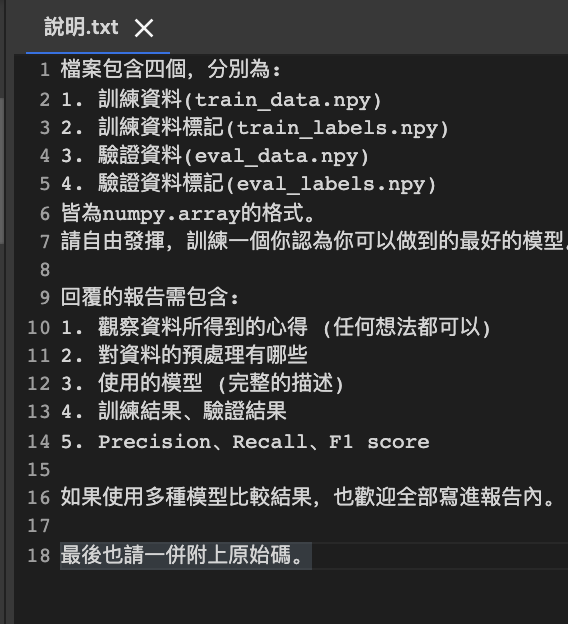

### Load Data

In [20]:
def import_data_from_drive(id):
  !wget --save-cookies cookies.txt 'https://docs.google.com/uc?export=download&id='{id} -O- \
  | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1/p' > confirm.txt && wget --content-disposition --load-cookies cookies.txt 'https://docs.google.com/uc?export=download&id='{id}'&confirm='$(<confirm.txt)

In [21]:
import_data_from_drive('1-1bEtnTqjRvYnhobN72aWI1E4KLAd2kz')

--2021-07-20 06:40:33--  https://docs.google.com/uc?export=download&id=1-1bEtnTqjRvYnhobN72aWI1E4KLAd2kz
Resolving docs.google.com (docs.google.com)... 173.194.214.100, 173.194.214.138, 173.194.214.101, ...
Connecting to docs.google.com (docs.google.com)|173.194.214.100|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘STDOUT’

-                       [ <=>                ]   3.20K  --.-KB/s    in 0s      

2021-07-20 06:40:33 (77.7 MB/s) - written to stdout [3277]

--2021-07-20 06:40:33--  https://docs.google.com/uc?export=download&id=1-1bEtnTqjRvYnhobN72aWI1E4KLAd2kz&confirm=DuaU
Resolving docs.google.com (docs.google.com)... 74.125.141.101, 74.125.141.138, 74.125.141.102, ...
Connecting to docs.google.com (docs.google.com)|74.125.141.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0s-as-docs.googleusercontent.com/docs/securesc/vo2vnhkf1bv1u8oscbrqhtkj7h98lccs/9j8ici

In [22]:
import_data_from_drive('1-74clMol_8xh9nccA4l0kC36kHAFxdjT')

--2021-07-20 06:40:41--  https://docs.google.com/uc?export=download&id=1-74clMol_8xh9nccA4l0kC36kHAFxdjT
Resolving docs.google.com (docs.google.com)... 74.125.141.101, 74.125.141.102, 74.125.141.100, ...
Connecting to docs.google.com (docs.google.com)|74.125.141.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘STDOUT’

-                       [ <=>                ]   3.20K  --.-KB/s    in 0s      

2021-07-20 06:40:41 (89.1 MB/s) - written to stdout [3276]

--2021-07-20 06:40:41--  https://docs.google.com/uc?export=download&id=1-74clMol_8xh9nccA4l0kC36kHAFxdjT&confirm=qGki
Resolving docs.google.com (docs.google.com)... 74.125.141.101, 74.125.141.113, 74.125.141.102, ...
Connecting to docs.google.com (docs.google.com)|74.125.141.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0c-bc-docs.googleusercontent.com/docs/securesc/vjqlrbc7kfgneu16lo30mqv30ihmnikv/lfane4vjk4

In [23]:
import pandas as pd
train_new=pd.read_csv('/content/train_ethanwu.csv')
eval_new=pd.read_csv('/content/eval_ethanwu.csv')

In [24]:
train_new.head(3)

,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,X_16,X_17,X_18,X_19,X_20,X_21,X_22,X_23,X_24,X_25,X_26,X_27,X_28,X_29,X_30,X_31,X_32,X_33,X_34,X_35,X_36,X_37,X_38,X_39,...,X_43,X_44,X_45,X_46,X_47,X_48,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56,X_57,X_58,X_59,X_60,X_61,X_62,X_63,X_64,X_65,X_66,X_67,X_68,X_69,Y,idx,Diff_cdf_idx,X_ec_0,X_ec_1,X_ec_2,X_ec_3,X_ec_4,X_ec_5,X_ec_6,X_ec_7,K_Group,K_Dis
0,0.853843,-0.709693,0.142649,-0.176952,0.117582,-0.152395,1.207672,0.245734,1.924513,0.601621,-0.439250,0.582352,-0.709693,0.058878,0.228716,0.080196,0.182907,0.052213,1.419680,0.204095,1.891033,0.491307,0.284242,-0.393284,0.746444,0.706549,0.869002,1.237137,0.995521,0.993360,1.363493,-0.201711,0.704825,0.661752,0.679638,1.089863,1.315128,-0.980191,-1.059645,-0.112974,...,-0.072508,-0.434420,0.372723,0.719581,0.543409,0.170987,0.349136,1.943812,0.138223,0.555792,0.609194,0.190231,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.255428,3.080873,0.255428,-1.787995,0.201544,0.352,0.393182,0.055556,1,0.000000,0.0,1.744522,1.160299,-0.883669,0.877856,-1.392369,-0.653584,-1.550606,-1.189766,NaN,NaN
1,1.128771,-0.029401,0.142649,-0.176952,0.117582,-0.152395,1.001865,1.037051,0.440938,0.447094,0.947879,0.196005,-0.029401,0.058878,0.228716,-3.181323,0.182907,0.052213,1.209400,0.977915,0.413308,0.963050,0.099428,0.893599,0.974448,1.458270,1.283931,0.684938,0.694759,1.255584,1.133564,0.861499,1.148253,0.205993,-0.043276,0.963712,0.555411,-0.728998,-0.749459,0.734531,...,0.419639,0.355975,0.946573,0.685234,0.814245,0.398241,0.349136,0.844309,0.576239,0.610637,0.609194,0.190231,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.255428,3.080873,0.255428,-1.787995,0.201544,0.352,0.393182,0.055556,1,0.085146,0.0,1.970847,1.066988,-0.968352,0.821676,-1.412726,-0.819275,-1.490602,-1.076384,NaN,NaN
2,0.508191,-0.029401,0.142649,-0.176952,0.117582,-0.152395,0.018900,-0.117963,0.015354,0.143816,-1.591742,0.767786,-0.029401,0.058878,0.228716,0.080196,-1.223046,0.052213,-2.115845,-0.557607,-0.168126,0.379000,-1.551185,0.741919,-0.904976,-0.161889,0.370369,1.156929,0.318626,1.064581,-0.386672,0.147871,0.305882,1.068863,0.904152,0.457248,1.058201,0.181213,0.348232,-0.375904,...,0.117733,0.266216,-1.344319,-1.565072,-1.683062,-1.537683,-1.020850,-0.486933,-0.044890,0.385113,0.609194,0.190231,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.255428,3.080873,0.255428,-1.787995,0.201544,0.352,0.393182,0.055556,2,0.425728,0.0,0.381090,1.941159,0.979016,0.636107,-1.972531,2.057982,-3.024776,-1.295628,NaN,NaN


#### 看train data資料筆數、Y分佈

In [25]:
#train data資料筆數
train_new.shape

(1108511, 83)

In [26]:
#train data Y分佈
train_new['Y'].value_counts()

0    571094
2    280471
1    256946
Name: Y, dtype: int64

In [27]:
train_new.columns

Index(['X_0', 'X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7', 'X_8', 'X_9',
       'X_10', 'X_11', 'X_12', 'X_13', 'X_14', 'X_15', 'X_16', 'X_17', 'X_18',
       'X_19', 'X_20', 'X_21', 'X_22', 'X_23', 'X_24', 'X_25', 'X_26', 'X_27',
       'X_28', 'X_29', 'X_30', 'X_31', 'X_32', 'X_33', 'X_34', 'X_35', 'X_36',
       'X_37', 'X_38', 'X_39', 'X_40', 'X_41', 'X_42', 'X_43', 'X_44', 'X_45',
       'X_46', 'X_47', 'X_48', 'X_49', 'X_50', 'X_51', 'X_52', 'X_53', 'X_54',
       'X_55', 'X_56', 'X_57', 'X_58', 'X_59', 'X_60', 'X_61', 'X_62', 'X_63',
       'X_64', 'X_65', 'X_66', 'X_67', 'X_68', 'X_69', 'Y', 'idx',
       'Diff_cdf_idx', 'X_ec_0', 'X_ec_1', 'X_ec_2', 'X_ec_3', 'X_ec_4',
       'X_ec_5', 'X_ec_6', 'X_ec_7', 'K_Group', 'K_Dis'],
      dtype='object')

In [9]:
train_new[['X_24', 'X_54', 'X_49', 'X_68','X_53', 'X_69', 'X_4', 'X_67']].head(3)

,X_24,X_54,X_49,X_68,X_53,X_69,X_4,X_67
0,0.746444,0.190231,0.349136,0.393182,0.609194,0.055556,0.117582,0.352
1,0.974448,0.190231,0.349136,0.393182,0.609194,0.055556,0.117582,0.352
2,-0.904976,0.190231,-1.020850,0.393182,0.609194,0.055556,0.117582,0.352


#### 看eval data資料筆數、Y分佈

In [10]:
eval_new.head(3)

,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,X_16,X_17,X_18,X_19,X_20,X_21,X_22,X_23,X_24,X_25,X_26,X_27,X_28,X_29,X_30,X_31,X_32,X_33,X_34,X_35,X_36,X_37,X_38,X_39,...,X_43,X_44,X_45,X_46,X_47,X_48,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56,X_57,X_58,X_59,X_60,X_61,X_62,X_63,X_64,X_65,X_66,X_67,X_68,X_69,Y,idx,Diff_cdf_idx,X_ec_0,X_ec_1,X_ec_2,X_ec_3,X_ec_4,X_ec_5,X_ec_6,X_ec_7,K_Group,K_Dis
0,-0.163385,1.728609,0.142649,-0.176952,0.117582,-0.152395,0.367092,0.396664,-0.568763,-0.659308,-1.460349,-1.277176,1.728609,0.058878,0.228716,0.080196,0.182907,0.052213,0.560829,0.351688,-0.592410,-2.147502,-1.072024,-1.373925,1.328402,0.773860,0.354308,-0.353238,0.826510,-0.406675,-0.980651,0.298315,-0.644835,-1.040539,-0.342384,-1.055419,-1.188373,-1.468080,-1.755555,0.065633,...,0.151821,0.545479,-0.901711,-0.777216,-0.750277,-2.998966,0.349136,-0.320419,-1.283056,3.540881,4.129956,0.151671,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.960784,0.0,0.0,0.336591,0.264297,0.315789,0.026261,1,0.000000,0.0,1.956733,0.281918,-1.468223,0.794614,-0.056324,-1.055890,-0.739701,-0.682902,NaN,NaN
1,-0.055390,1.519337,0.142649,-0.176952,0.117582,-0.152395,0.625994,-0.385464,-1.628485,0.106094,0.769114,-0.539004,1.519337,0.058878,0.228716,0.080196,0.182907,0.052213,0.825359,-0.413147,-1.647954,-1.962196,-0.156601,0.694417,0.957313,0.813600,0.422047,-0.755981,0.571840,0.627638,0.461960,0.231801,-0.644835,1.068863,-1.034593,-1.362928,-1.545531,0.855117,0.790379,0.346429,...,0.086763,0.722958,-1.428631,-1.967404,-1.813329,-0.242018,0.349136,-0.571870,0.004159,1.815301,4.129956,0.151671,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.960784,0.0,0.0,0.336591,0.264297,0.315789,0.026261,1,0.085085,0.0,1.643025,0.494163,-1.262952,0.838549,-0.118318,-0.753844,-0.848680,-0.769913,NaN,NaN
2,-0.163385,1.519337,0.142649,-0.176952,0.117582,-0.152395,0.423988,0.171544,-0.373376,0.901865,-0.557337,0.289089,1.519337,0.058878,0.228716,0.080196,0.182907,0.052213,0.618962,0.131545,-0.397794,-2.147502,0.795142,-0.536173,1.066405,0.629312,-0.153364,-0.107050,-0.972231,-0.220350,-1.344064,0.053433,0.529420,1.068863,-1.417589,-1.743812,1.058201,0.749375,0.648170,0.949950,...,0.910214,0.870741,-2.323477,-2.121811,-2.128943,-0.175742,0.349136,-0.342998,0.241700,1.923077,4.129956,0.151671,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.960784,0.0,0.0,0.336591,0.264297,0.315789,0.026261,1,0.170169,0.0,1.735248,0.431768,-1.323297,0.825633,-0.100094,-0.842639,-0.816643,-0.744334,NaN,NaN


In [11]:
eval_new.shape

(1161890, 83)

In [12]:
#eval data Y分佈
eval_new['Y'].value_counts()

0    621981
2    290870
1    249039
Name: Y, dtype: int64

In [28]:
Sep_col = ['X_0',"X_24",'X_18']

In [29]:
train_new[train_new["Y"]!=0][Sep_col].mean(axis=1).quantile(0.4)

-0.4843981518409465

In [30]:
train_new[train_new["Y"]==0][Sep_col].quantile(0.4)

X_0    -0.444230
X_24   -0.607608
X_18   -0.119780
Name: 0.4, dtype: float64

In [31]:
train_new['Sep_mean'] = train_new[Sep_col].mean(axis=1)
eval_new['Sep_mean'] = eval_new[Sep_col].mean(axis=1)

In [32]:
DarkArt_sccol = 'Sep_mean'
DarkArt_FEcol = 'Sep_mean_kde'

In [33]:
train_new[DarkArt_FEcol] = train_new[DarkArt_sccol]
eval_new[DarkArt_FEcol] = eval_new[DarkArt_sccol]

In [34]:
#index長度不同，要標準化
train_new[DarkArt_FEcol] = train_new[DarkArt_FEcol]/max(train_new[DarkArt_FEcol])*100
eval_new[DarkArt_FEcol] = eval_new[DarkArt_FEcol]/max(eval_new[DarkArt_FEcol])*100

In [35]:
train_new.head(3)

,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,X_16,X_17,X_18,X_19,X_20,X_21,X_22,X_23,X_24,X_25,X_26,X_27,X_28,X_29,X_30,X_31,X_32,X_33,X_34,X_35,X_36,X_37,X_38,X_39,...,X_45,X_46,X_47,X_48,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56,X_57,X_58,X_59,X_60,X_61,X_62,X_63,X_64,X_65,X_66,X_67,X_68,X_69,Y,idx,Diff_cdf_idx,X_ec_0,X_ec_1,X_ec_2,X_ec_3,X_ec_4,X_ec_5,X_ec_6,X_ec_7,K_Group,K_Dis,Sep_mean,Sep_mean_kde
0,0.853843,-0.709693,0.142649,-0.176952,0.117582,-0.152395,1.207672,0.245734,1.924513,0.601621,-0.439250,0.582352,-0.709693,0.058878,0.228716,0.080196,0.182907,0.052213,1.419680,0.204095,1.891033,0.491307,0.284242,-0.393284,0.746444,0.706549,0.869002,1.237137,0.995521,0.993360,1.363493,-0.201711,0.704825,0.661752,0.679638,1.089863,1.315128,-0.980191,-1.059645,-0.112974,...,0.372723,0.719581,0.543409,0.170987,0.349136,1.943812,0.138223,0.555792,0.609194,0.190231,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.255428,3.080873,0.255428,-1.787995,0.201544,0.352,0.393182,0.055556,1,0.000000,0.0,1.744522,1.160299,-0.883669,0.877856,-1.392369,-0.653584,-1.550606,-1.189766,NaN,NaN,1.006656,27.943602
1,1.128771,-0.029401,0.142649,-0.176952,0.117582,-0.152395,1.001865,1.037051,0.440938,0.447094,0.947879,0.196005,-0.029401,0.058878,0.228716,-3.181323,0.182907,0.052213,1.209400,0.977915,0.413308,0.963050,0.099428,0.893599,0.974448,1.458270,1.283931,0.684938,0.694759,1.255584,1.133564,0.861499,1.148253,0.205993,-0.043276,0.963712,0.555411,-0.728998,-0.749459,0.734531,...,0.946573,0.685234,0.814245,0.398241,0.349136,0.844309,0.576239,0.610637,0.609194,0.190231,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.255428,3.080873,0.255428,-1.787995,0.201544,0.352,0.393182,0.055556,1,0.085146,0.0,1.970847,1.066988,-0.968352,0.821676,-1.412726,-0.819275,-1.490602,-1.076384,NaN,NaN,1.104206,30.651488
2,0.508191,-0.029401,0.142649,-0.176952,0.117582,-0.152395,0.018900,-0.117963,0.015354,0.143816,-1.591742,0.767786,-0.029401,0.058878,0.228716,0.080196,-1.223046,0.052213,-2.115845,-0.557607,-0.168126,0.379000,-1.551185,0.741919,-0.904976,-0.161889,0.370369,1.156929,0.318626,1.064581,-0.386672,0.147871,0.305882,1.068863,0.904152,0.457248,1.058201,0.181213,0.348232,-0.375904,...,-1.344319,-1.565072,-1.683062,-1.537683,-1.020850,-0.486933,-0.044890,0.385113,0.609194,0.190231,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.255428,3.080873,0.255428,-1.787995,0.201544,0.352,0.393182,0.055556,2,0.425728,0.0,0.381090,1.941159,0.979016,0.636107,-1.972531,2.057982,-3.024776,-1.295628,NaN,NaN,-0.837543,-23.249236


In [36]:
def CDF_func(dataframe,feature,start,end,step,FileName):
    #initial
    N = len(dataframe[feature])
    seq = dataframe[feature].sort_values().reset_index(drop=True)
    cdf_range = range(start,end,step)

    tmp_cdframe = pd.DataFrame(
            [sum(seq<value)/N for value in cdf_range],columns=['cdf'])
    tmp_cdframe.index = cdf_range
    
    globals()['cdf_frame_'+str(FileName)] = tmp_cdframe
    print("Done!File Name: cdf_frame_"+ str(FileName))

In [37]:
from tqdm import tqdm
for N in tqdm(range(3)):
  CDF_func(train_new[train_new['Y']==N],DarkArt_FEcol,int(min(train_new[DarkArt_FEcol])-10),int(max(train_new[DarkArt_FEcol])+10),10,'feat_'+str(N))

 33%|███▎      | 1/3 [00:03<00:06,  3.26s/it]

Done!File Name: cdf_frame_feat_0


 67%|██████▋   | 2/3 [00:04<00:02,  2.55s/it]

Done!File Name: cdf_frame_feat_1


100%|██████████| 3/3 [00:05<00:00,  1.70s/it]

Done!File Name: cdf_frame_feat_2


In [38]:
train_new['cdf_idx_0'] = cdf_frame_feat_0.loc[round((train_new[DarkArt_FEcol]//10)*10)].reset_index(drop=True)
train_new['cdf_idx_1'] = cdf_frame_feat_1.loc[round((train_new[DarkArt_FEcol]//10)*10)].reset_index(drop=True)
train_new['cdf_idx_2'] = cdf_frame_feat_2.loc[round((train_new[DarkArt_FEcol]//10)*10)].reset_index(drop=True)

In [39]:
train_new['Diff_scale'] = train_new[['cdf_idx_1','cdf_idx_2']].min(axis=1)-train_new['cdf_idx_0']
train_new['Diff_var'] = train_new[['cdf_idx_0','cdf_idx_1','cdf_idx_2']].var(axis=1)

In [40]:
train_new.head(10)

,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,X_16,X_17,X_18,X_19,X_20,X_21,X_22,X_23,X_24,X_25,X_26,X_27,X_28,X_29,X_30,X_31,X_32,X_33,X_34,X_35,X_36,X_37,X_38,X_39,...,X_50,X_51,X_52,X_53,X_54,X_55,X_56,X_57,X_58,X_59,X_60,X_61,X_62,X_63,X_64,X_65,X_66,X_67,X_68,X_69,Y,idx,Diff_cdf_idx,X_ec_0,X_ec_1,X_ec_2,X_ec_3,X_ec_4,X_ec_5,X_ec_6,X_ec_7,K_Group,K_Dis,Sep_mean,Sep_mean_kde,cdf_idx_0,cdf_idx_1,cdf_idx_2,Diff_scale,Diff_var
0,0.853843,-0.709693,0.142649,-0.176952,0.117582,-0.152395,1.207672,0.245734,1.924513,0.601621,-0.439250,0.582352,-0.709693,0.058878,0.228716,0.080196,0.182907,0.052213,1.419680,0.204095,1.891033,0.491307,0.284242,-0.393284,0.746444,0.706549,0.869002,1.237137,0.995521,0.993360,1.363493,-0.201711,0.704825,0.661752,0.679638,1.089863,1.315128,-0.980191,-1.059645,-0.112974,...,1.943812,0.138223,0.555792,0.609194,0.190231,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.255428,3.080873,0.255428,-1.787995,0.201544,0.352000,0.393182,0.055556,1,0.000000,0.0,1.744522,1.160299,-0.883669,0.877856,-1.392369,-0.653584,-1.550606,-1.189766,NaN,NaN,1.006656,27.943602,0.768880,0.487429,0.998620,-0.281451,0.065552
1,1.128771,-0.029401,0.142649,-0.176952,0.117582,-0.152395,1.001865,1.037051,0.440938,0.447094,0.947879,0.196005,-0.029401,0.058878,0.228716,-3.181323,0.182907,0.052213,1.209400,0.977915,0.413308,0.963050,0.099428,0.893599,0.974448,1.458270,1.283931,0.684938,0.694759,1.255584,1.133564,0.861499,1.148253,0.205993,-0.043276,0.963712,0.555411,-0.728998,-0.749459,0.734531,...,0.844309,0.576239,0.610637,0.609194,0.190231,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.255428,3.080873,0.255428,-1.787995,0.201544,0.352000,0.393182,0.055556,1,0.085146,0.0,1.970847,1.066988,-0.968352,0.821676,-1.412726,-0.819275,-1.490602,-1.076384,NaN,NaN,1.104206,30.651488,0.921960,0.799697,0.999750,-0.122263,0.010170
2,0.508191,-0.029401,0.142649,-0.176952,0.117582,-0.152395,0.018900,-0.117963,0.015354,0.143816,-1.591742,0.767786,-0.029401,0.058878,0.228716,0.080196,-1.223046,0.052213,-2.115845,-0.557607,-0.168126,0.379000,-1.551185,0.741919,-0.904976,-0.161889,0.370369,1.156929,0.318626,1.064581,-0.386672,0.147871,0.305882,1.068863,0.904152,0.457248,1.058201,0.181213,0.348232,-0.375904,...,-0.486933,-0.044890,0.385113,0.609194,0.190231,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.255428,3.080873,0.255428,-1.787995,0.201544,0.352000,0.393182,0.055556,2,0.425728,0.0,0.381090,1.941159,0.979016,0.636107,-1.972531,2.057982,-3.024776,-1.295628,NaN,NaN,-0.837543,-23.249236,0.030475,0.000895,0.074264,-0.029580,0.001363
3,-0.960366,0.067079,0.142649,-0.176952,0.117582,-0.152395,0.294184,0.245734,0.029692,-1.833255,-0.233885,-0.195923,0.067079,0.058878,0.228716,0.080196,0.182907,0.052213,0.500566,-0.204118,0.193646,0.408965,-0.245018,0.760394,-0.828727,0.661412,0.895716,-1.329634,-0.206732,0.516151,-0.599254,0.908586,0.578957,-0.533478,-1.315561,0.948769,1.058201,0.153937,0.282045,0.766180,...,-0.232407,-0.815311,0.359173,0.609194,0.190231,0.0,0.0,0.0,1.0,1.0,0.0,0.000000,0.255428,3.080873,0.255428,-1.787995,0.201544,0.352000,0.393182,0.055556,2,0.510873,0.0,0.414463,1.927189,0.878222,0.640410,-1.914422,1.913625,-2.928203,-1.304806,NaN,NaN,-0.429509,-11.922678,0.190828,0.003335,0.373835,-0.187493,0.034319
4,-0.095985,0.063285,0.142649,-0.176952,0.117582,-0.152395,0.498409,0.198770,0.161374,-2.283375,0.026324,-0.099196,0.063285,0.058878,0.228716,0.080196,0.182907,0.052213,-1.178897,0.058124,0.146931,0.619393,-0.143570,0.897398,-0.910599,0.502668,1.125604,-1.329634,-1.038162,-0.902027,0.244564,0.949307,1.040046,-1.391977,0.904152,0.948769,1.058201,0.238174,0.500679,0.940091,...,-0.106326,-0.654144,0.320683,0.609194,0.190231,0.0,0.0,0.0,1.0,1.0,0.0,0.000000,0.255428,3.080873,0.255428,-1.787995,0.201544,0.352000,0.393182,0.055556,2,0.596019,0.0,0.374116,1.942041,0.988779,0.635980,-1.977688,2.068164,-3.033529,-1.303077,NaN,NaN,-0.728494,-20.222142,0.030475,0.000895,0.074264,-0.029580,0.001363
5,-0.316638,-1.888699,0.142649,-0.176952,0.117582,-0.152395,0.612085,

In [41]:
from tqdm import tqdm
for N in tqdm(range(3)):
  CDF_func(eval_new[eval_new['Y']==N],DarkArt_FEcol,int(min(eval_new[DarkArt_FEcol])-13),int(max(eval_new[DarkArt_FEcol])+17),10,'feat_'+str(N))

 33%|███▎      | 1/3 [00:02<00:05,  2.70s/it]

Done!File Name: cdf_frame_feat_0


 67%|██████▋   | 2/3 [00:03<00:02,  2.18s/it]

Done!File Name: cdf_frame_feat_1


100%|██████████| 3/3 [00:04<00:00,  1.59s/it]

Done!File Name: cdf_frame_feat_2


In [42]:
eval_new['cdf_idx_0'] = cdf_frame_feat_0.loc[round((eval_new[DarkArt_FEcol]//10)*10)].reset_index(drop=True)
eval_new['cdf_idx_1'] = cdf_frame_feat_1.loc[round((eval_new[DarkArt_FEcol]//10)*10)].reset_index(drop=True)
eval_new['cdf_idx_2'] = cdf_frame_feat_2.loc[round((eval_new[DarkArt_FEcol]//10)*10)].reset_index(drop=True)

In [43]:
eval_new['Diff_scale'] = eval_new[['cdf_idx_1','cdf_idx_2']].min(axis=1)-eval_new['cdf_idx_0']
eval_new['Diff_var'] = eval_new[['cdf_idx_0','cdf_idx_1','cdf_idx_2']].var(axis=1)

#Second Stage

In [44]:
DarkArt_sccol = 'Diff_var'
DarkArt_FEcol = 'Diff_var_kde'

In [45]:
train_new[DarkArt_FEcol] = train_new[DarkArt_sccol]
eval_new[DarkArt_FEcol] = eval_new[DarkArt_sccol]

In [46]:
#index長度不同，要標準化
train_new[DarkArt_FEcol] = train_new[DarkArt_FEcol]/max(train_new[DarkArt_FEcol])*100
eval_new[DarkArt_FEcol] = eval_new[DarkArt_FEcol]/max(eval_new[DarkArt_FEcol])*100

In [47]:
from tqdm import tqdm
for N in tqdm(range(3)):
  CDF_func(train_new[train_new['Y']==N],DarkArt_FEcol,int(min(train_new[DarkArt_FEcol])-10),int(max(train_new[DarkArt_FEcol])+10),10,'feat_'+str(N))

 33%|███▎      | 1/3 [00:01<00:03,  1.62s/it]

Done!File Name: cdf_frame_feat_0


 67%|██████▋   | 2/3 [00:02<00:01,  1.33s/it]

Done!File Name: cdf_frame_feat_1


100%|██████████| 3/3 [00:02<00:00,  1.01it/s]

Done!File Name: cdf_frame_feat_2


In [48]:
train_new['cdf_Diff_var_0'] = cdf_frame_feat_0.loc[round((train_new[DarkArt_FEcol]//10)*10)].reset_index(drop=True)
train_new['cdf_Diff_var_1'] = cdf_frame_feat_1.loc[round((train_new[DarkArt_FEcol]//10)*10)].reset_index(drop=True)
train_new['cdf_Diff_var_2'] = cdf_frame_feat_2.loc[round((train_new[DarkArt_FEcol]//10)*10)].reset_index(drop=True)

In [49]:
train_new['Diff_scale_1'] = train_new[['cdf_Diff_var_1','cdf_Diff_var_2']].min(axis=1)-train_new['cdf_Diff_var_0']
train_new['Diff_var_1'] = train_new[['cdf_Diff_var_0','cdf_Diff_var_1','cdf_Diff_var_2']].var(axis=1)

In [50]:
from tqdm import tqdm
for N in tqdm(range(3)):
  CDF_func(eval_new[eval_new['Y']==N],DarkArt_FEcol,int(min(eval_new[DarkArt_FEcol])-10),int(max(eval_new[DarkArt_FEcol])+17),10,'feat_'+str(N))

 33%|███▎      | 1/3 [00:01<00:03,  1.83s/it]

Done!File Name: cdf_frame_feat_0


 67%|██████▋   | 2/3 [00:02<00:01,  1.49s/it]

Done!File Name: cdf_frame_feat_1


100%|██████████| 3/3 [00:03<00:00,  1.08s/it]

Done!File Name: cdf_frame_feat_2


In [51]:
eval_new['cdf_Diff_var_0'] = cdf_frame_feat_0.loc[round((eval_new[DarkArt_FEcol]//10)*10)].reset_index(drop=True)
eval_new['cdf_Diff_var_1'] = cdf_frame_feat_1.loc[round((eval_new[DarkArt_FEcol]//10)*10)].reset_index(drop=True)
eval_new['cdf_Diff_var_2'] = cdf_frame_feat_2.loc[round((eval_new[DarkArt_FEcol]//10)*10)].reset_index(drop=True)

In [52]:
eval_new['Diff_scale_1'] = eval_new[['cdf_idx_1','cdf_idx_2']].min(axis=1)-eval_new['cdf_idx_0']
eval_new['Diff_var_1'] = eval_new[['cdf_idx_0','cdf_idx_1','cdf_idx_2']].var(axis=1)

# Training


In [53]:
import lightgbm as lgb

In [54]:
d_train=lgb.Dataset(train_new.drop(['Y','K_Group','K_Dis'], axis=1), label=train_new['Y'])
d_val=lgb.Dataset(eval_new.drop(['Y','K_Group','K_Dis'], axis=1), label=eval_new['Y'])

In [55]:
del train_new 

In [63]:
params={}
params['learning_rate']=0.05
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']='multiclass' #Multi-class target feature ->default:regression
params['metric']='multi_logloss'#params['metric']='binary' #metric for multi-class
params['max_depth']=60
params['num_boost_round']=1000
params['feature_fraction'] = 0.95 # sub_row
params['bagging_fraction'] = 0.95 # sub_row
params['bagging_freq'] = 20
params['num_leaves'] = 100        # num_leaf
params['min_data'] = 300         # min_data_in_leaf        
params['num_class']=3 #no.of unique values in the target class not inclusive of the end value
watchlist = [d_val]

In [64]:
clfer = lgb.train(params, d_train,d_val,watchlist, early_stopping_rounds=50)

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's multi_logloss: 0.995042
Training until validation scores don't improve for 50 rounds.
[2]	valid_0's multi_logloss: 0.979045
[3]	valid_0's multi_logloss: 0.96424
[4]	valid_0's multi_logloss: 0.950472
[5]	valid_0's multi_logloss: 0.937721
[6]	valid_0's multi_logloss: 0.9256
[7]	valid_0's multi_logloss: 0.914346
[8]	valid_0's multi_logloss: 0.903789
[9]	valid_0's multi_logloss: 0.893897
[10]	valid_0's multi_logloss: 0.884496
[11]	valid_0's multi_logloss: 0.875641
[12]	valid_0's multi_logloss: 0.86738
[13]	valid_0's multi_logloss: 0.859574
[14]	valid_0's multi_logloss: 0.852139
[15]	valid_0's multi_logloss: 0.845125
[16]	valid_0's multi_logloss: 0.838547
[17]	valid_0's multi_logloss: 0.832327
[18]	valid_0's multi_logloss: 0.826395
[19]	valid_0's multi_logloss: 0.820747
[20]	valid_0's multi_logloss: 0.815376
[21]	valid_0's multi_logloss: 0.810303
[22]	valid_0's multi_logloss: 0.805467
[23]	valid_0's multi_logloss: 0.800899
[24]	valid_0's multi_logloss: 0.796503
[25]	valid_0's 

### Evaluate Model Performance without Kmeans Feature

In [65]:
val_pred_prob = clfer.predict(eval_new.drop(['Y'], axis=1))

In [66]:
import numpy as np
val_pred = [np.argmax(x) for x in val_pred_prob]

In [67]:
val_pred = np.array(val_pred)

In [68]:
report = metrics.classification_report(eval_new['Y'], val_pred)
Acc = metrics.accuracy_score(eval_new['Y'], val_pred)
print('Report:',report,'\n' 
      'Accuracy:', Acc)

Report:               precision    recall  f1-score   support

           0       0.60      0.72      0.66    621981
           1       0.59      0.46      0.52    249039
           2       0.58      0.43      0.49    290870

    accuracy                           0.59   1161890
   macro avg       0.59      0.54      0.56   1161890
weighted avg       0.59      0.59      0.59   1161890
 
Accuracy: 0.5944925939632839


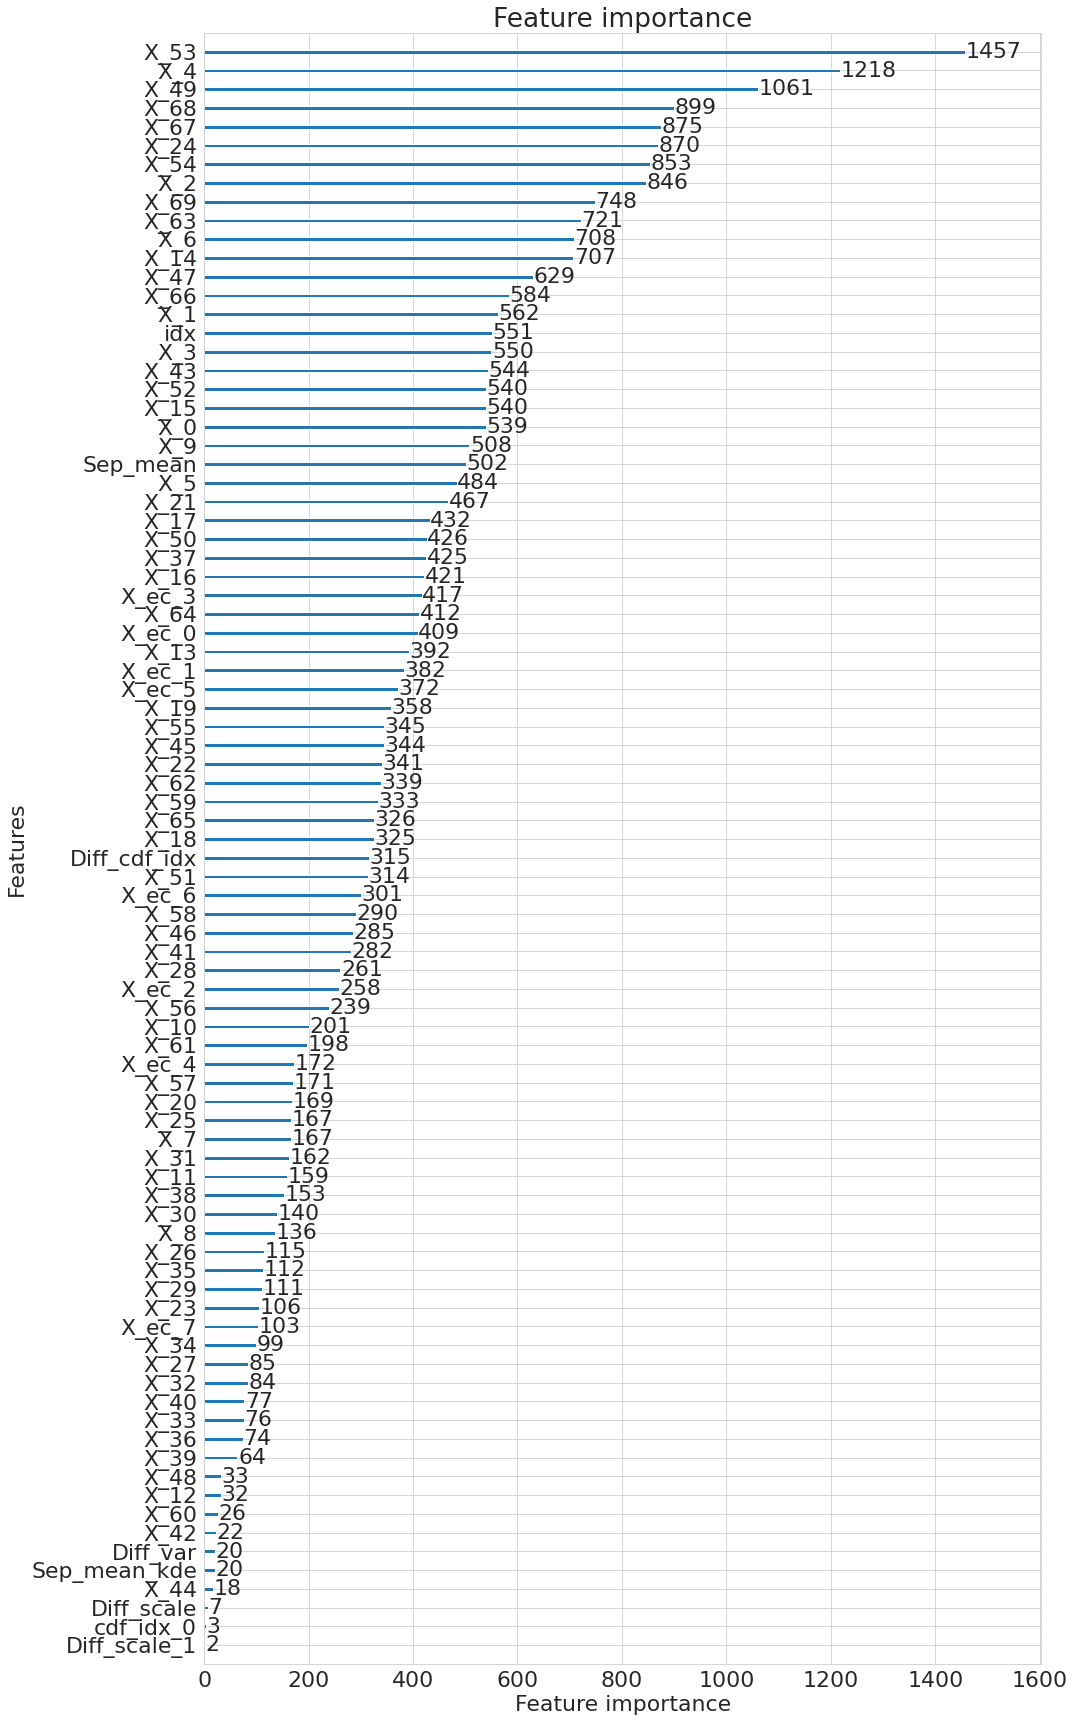

In [69]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"]=(15,30)
plt.rcParams.update({"font.size":22})
lgb.plot_importance(clfer)